In [25]:
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from sklearn.preprocessing import StandardScaler

%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

## Задание 1
Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

# Описание DataFrame

Эти данные являются результатами химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. Анализ определил количество 13 компонентов, обнаруженных в каждом из трех типов вин.

## Атрибуты
- Алкоголь
- Яблочная кислота
- Зола
- Щелочность золы
- Магний
- Общие фенолы
- Флавоноиды
- Нефлаваноидные фенолы
- Проантоцианы
- Интенсивность цвета
- Оттенок
- OD280/OD315 разбавленных вин
- Пролин

In [19]:
cols_name = ['Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',\
             'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',\
             'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [20]:
df_wine = pd.read_csv('../data/wine.data.csv', header=None)
df_wine.columns = cols_name
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## Задание 2
Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [21]:
df_wine.drop_duplicates(inplace=True)

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Type                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

## Задание 3
Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

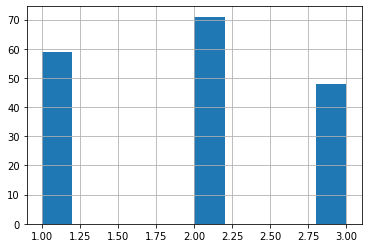

In [22]:
df_wine['Type'].hist()

Данные сбалансированны

## Задание 4
Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

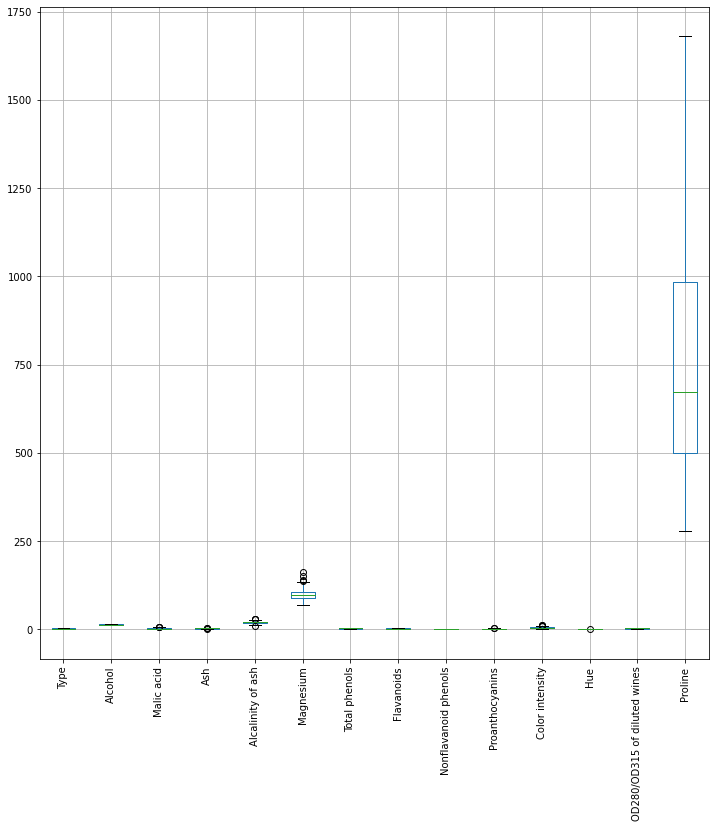

In [23]:
rcParams['figure.figsize'] = 12, 12
df_wine.boxplot()
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

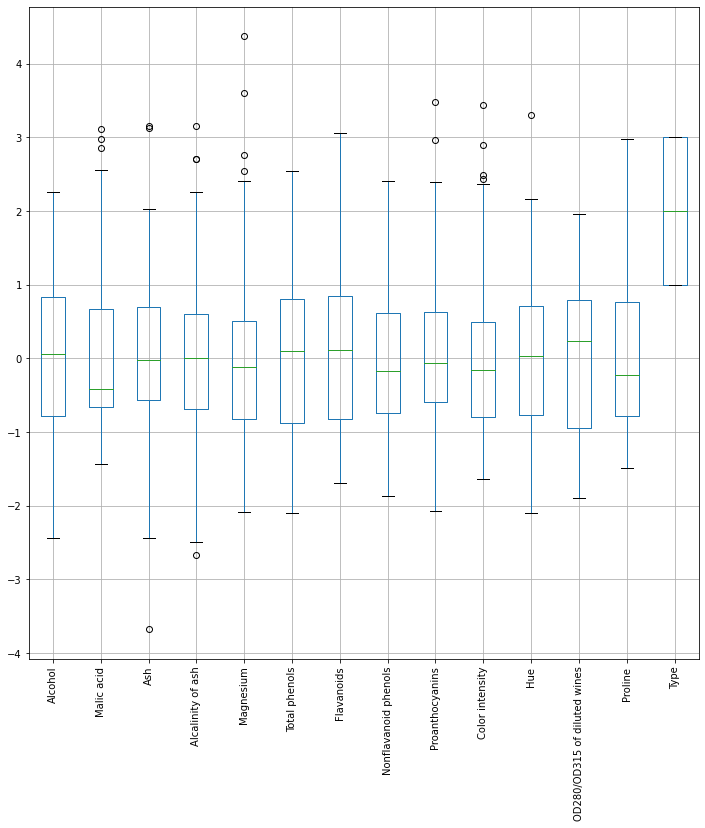

In [28]:
scaler = StandardScaler()

df_wine_scaled = scaler.fit_transform(df_wine[cols_name[1:]])
df_wine_scaled = pd.DataFrame(df_wine_scaled, columns=df_wine.columns[1:])


df_wine_scaled['Type'] = df_wine.Type
df_wine_scaled.boxplot()
plt.xticks(rotation=90)

## Задание 6
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

In [29]:
df_wine_scaled.corr()['Type']

Alcohol                        -0.328222
Malic acid                      0.437776
Ash                            -0.049643
Alcalinity of ash               0.517859
Magnesium                      -0.209179
Total phenols                  -0.719163
Flavanoids                     -0.847498
Nonflavanoid phenols            0.489109
Proanthocyanins                -0.499130
Color intensity                 0.265668
Hue                            -0.617369
OD280/OD315 of diluted wines   -0.788230
Proline                        -0.633717
Type                            1.000000
Name: Type, dtype: float64

Данные столбцов 'Alcalinity of ash' и 'Magnesium' плохо коррелируют с целевой переменной 'Type'

In [30]:
df_wine_scaled_lin = df_wine_scaled.drop(axis=0, columns=['Alcalinity of ash', 'Magnesium'])
df_wine_scaled_lin

,Alcohol,Malic acid,Ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Type
0,1.518613,-0.562250,0.232053,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


## Задание 8
Решите поставленную задачу классификации в соответствии с заданием. 

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

In [37]:
# разделим полученные данные на данные для обучения и теста
X = np.array(df_wine_scaled_lin.drop('Type', axis=1))
y = np.array(df_wine_scaled_lin['Type']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
knc = KNeighborsClassifier()
params = {
    'n_neighbors': range(5, 12),
}

knc_grid = GridSearchCV(knc, params)
knc_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 12)})

In [40]:
best_niegh = knc_grid.best_estimator_.n_neighbors
best_score = knc_grid.best_score_
print('best train score:', best_score, '\t at radius:', best_radius)

best train score: 0.9513333333333334 	 at radius: 8


In [41]:
knc = KNeighborsClassifier(n_neighbors=best_niegh)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [46]:
from sklearn.metrics import accuracy_score

print(f'Точность на test: {accuracy_score(y_test, knc.predict(X_test)):.5f}')
print(f'Точность на train: {accuracy_score(y_train, knc.predict(X_train)):.5f}')

Точность на test: 0.94444
Точность на train: 0.96774
